# PytzMLS2018: Python for ML and DS Research - PIL: Python Imaging Library

<center>**Anthony Faustine (sambaiga@gmail.com)**</center>

[PIL or Python Imaging Library](https://pillow.readthedocs.io/en/5.0.0/index.html) is a package that exposes many functions to manipulate images from a Python script. It  adds support for opening, manipulating, and saving images.

## 7.1 Loading an image
The most important class in the Python Imaging Library is the Image class which can be loaded from PIL as `from PIL import Image`. To load an image from a file, use the `open()` function in the Image module:

In [4]:
from PIL import Image

In [12]:
image = Image.open("../data/images/cat.jpg")

To display the image you  use `show()` function

In [13]:
image.show()

In [14]:
# Print image information
print('Size: {}: {}: {}'.format(image.size, image.mode, image.format))

Size: (296, 350): RGB: JPEG


## 7.2 Image transformation

PIL offer several function for transforming images. We can resize images using `resize()` function, rotate image with `rotate()` function and crop an image with `crop()` function.

### 7.2.1 Resize Image

In [15]:
width, height = image.size
new_width, new_height = (150, 100)

#### Resize image without preserving aspect ratio

In [20]:
resized_image = image.resize((new_width, new_height))
resized_image.show()

#### Resize by preserving aspect ratio

In [18]:
# Float casting the height so that the ratio is a float number
ratio = width / float(height)

In [19]:
# Casting to integer because we are working with pixels
new_height = int(new_width / ratio)
# or new_width = int(new_height * ratio)
resized_image = image.resize((new_width, new_height))
resized_image.show()

###  7.2.2 Rotate or flipp an image

In [21]:
rotated_image = image.rotate(60)
rotated_image.show()

You can aslo rotate an image using `transpose`  function  which supports these values:
- `FLIP_LEFT_RIGHT`
-  `FLIP_TOP_BOTTOM`
- `ROTATE_90`
- `ROTATE_180`
- `ROTATE_270`

In [24]:
rotated_image = image.transpose(Image.FLIP_TOP_BOTTOM)
rotated_image.show()

### 7.2.3 Crop an Image

When an image is cropped, a rectangular region inside the image is selected and retained while everything else outside the region is removed.

To crop an image you need  to define the region which is going to be cropped. A region is defined like this: (left, upper, right, lower) where (left, upper) are the coordinates of the starting point and (right, lower) are the coordinates of the ending point.

In [26]:
region = (135, 160, 235, 260)  # 100x100 region
image_crop = image.crop(region)
image_crop.show()

## 7.3 Channels

The `split` function splits image's channels and returns a tuple of channels or the same image if the mode is L or 1.

In [27]:
image = Image.open("../data/images/zebra.jpg")

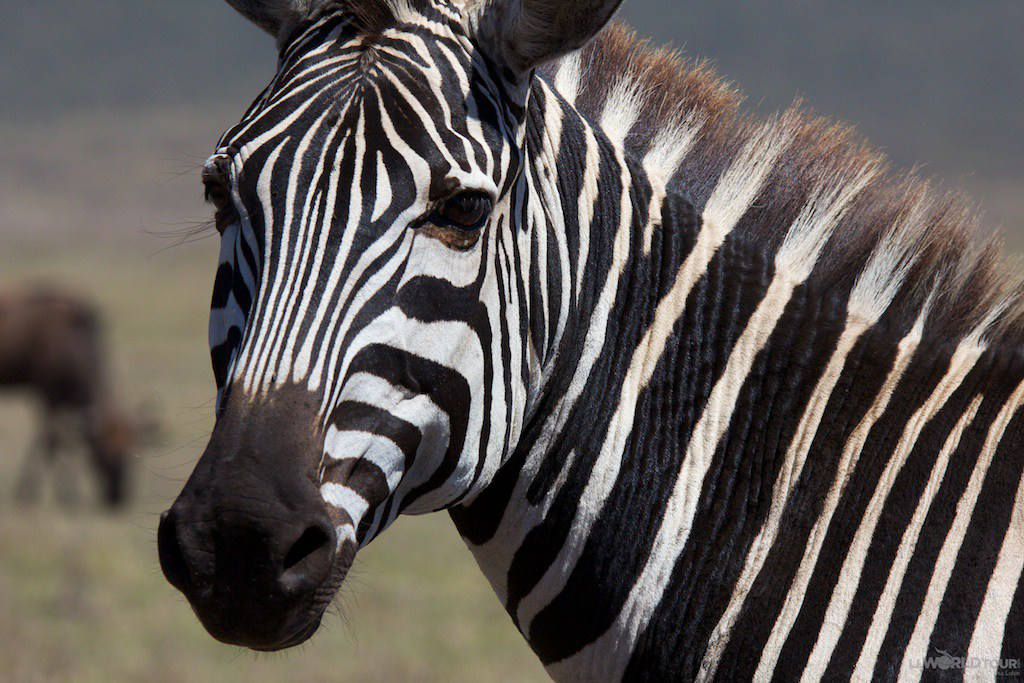

In [28]:
image

In [29]:
r, g, b = image.split()

In [30]:
r.show('R channel')
g.show('G channel')
b.show('B channel')

We will now make images out of each of these channels and visualise them. In order to show the actual color of the channel, we will need to create
a completely black image representing channel with 0 values.Image.new creates a black image by default.

In [31]:
# Split the channels
red, green, blue = image.split()

In [32]:
#convert the image from RGBA to L mode which will result in a black and white image.
black = Image.new('L', image.size)

In [33]:
green_image = Image.merge('RGB', [black, green, black])
green_image.show('Green channel')

In [34]:
red_image = Image.merge('RGB', [red, black, black])
red_image.show('Red channel')

In [35]:
blue_image = Image.merge('RGB', [black, black, blue])
blue_image.show('Blue channel')

## 7.4 Image enhancements
The Python Imaging Library provides a number of methods and modules that can be used to enhance images by color, contrast, brightness or sharpness.

In [40]:
from PIL import ImageEnhance
import time

### 7.4.1 Color

In [37]:
color_enhancer = ImageEnhance.Color(image)

In [38]:
# Enhancement factor of 0 gives a black and white image (no color)
color_enhancer.enhance(0).show('Color factor: 0')


In [39]:
# Enhancement factor of 1 gives the original image
color_enhancer.enhance(1).show('Color factor: 1')

In [41]:
# Let's saturate the image now by increasing the factor above 1 (up to 2)
for i in range(10):
    factor = 1 + i / 10.0
    time.sleep(0.2)
    color_enhancer.enhance(factor).show('Color factor: %s' % factor)

### 7.4.2 Contrast

In [42]:
color_enhancer = ImageEnhance.Contrast(image)


In [43]:
# Enhancement factor of 0 gives solid grey image
color_enhancer.enhance(0).show('Contrast factor: 0')

In [44]:
# Enhancement factor of 1 gives the original image
color_enhancer.enhance(1).show('Contrast factor: 1')

In [45]:
# Increase the contrast of the image by increasing the factor
 # above 1 (up to 2)
for i in range(10):
    factor = 1 + i / 10.0
    time.sleep(0.2)
    color_enhancer.enhance(factor).show('Contrast factor: %s' % factor)

### 7.4.3 Brightness

In [46]:
color_enhancer = ImageEnhance.Brightness(image)

In [47]:
# Enhancement factor of 0 gives solid black image
color_enhancer.enhance(0).show('Brightness factor: 0')

In [48]:
# Enhancement factor of 1 gives the original image
color_enhancer.enhance(1).show('Brightness factor: 1')

In [49]:
# Increase the brightness of the image by increasing the factor
# above 1 (up to 2)
for i in range(10):
    factor = 1 + i / 10.0
    time.sleep(0.2)
    color_enhancer.enhance(factor).show('Brightness factor: %s' % factor)

### 7.4.5 Sharpness

In [50]:
color_enhancer = ImageEnhance.Sharpness(image)


In [51]:
# Enhancement factor of 0 gives blurred image
color_enhancer.enhance(0).show('Sharpness factor: 0')

In [52]:
# Enhancement factor of 1 gives the original image
color_enhancer.enhance(1).show('Sharpness factor: 1')

In [54]:
for i in range(10):
    factor = 1 + i / 10.0
    time.sleep(0.2)
    color_enhancer.enhance(factor).show('Sharpness factor: %s' % factor)

## 7.5 Filter

The `ImageFilter` module contains a number of pre-defined enhancement filters that can be used with the `filter()` method.

In [55]:
from PIL import  ImageFilter

In [61]:
# Normal blur
blurred_image = image.filter(ImageFilter.BLUR)
blurred_image.show('Normal Blur')

In [58]:
# Gaussian blur with radius 1-10
for i in range(10):
    radius = 1 + i
    time.sleep(0.5)

    image_filter = ImageFilter.GaussianBlur(radius=radius)
    blurred_image = image.filter(image_filter)
    blurred_image.show('Gaussian Blur (radius %s)' % radius)

In [65]:
blurred_image = image.filter(ImageFilter.EDGE_ENHANCE)
blurred_image.show()

## References

1. [py-pil-imageprocessing](https://github.com/gkostadinov/py-pil-imageprocessing)
2. [PIllow Tutorial](https://pillow.readthedocs.io/en/5.0.0/handbook/tutorial.html)